# SBD MSG Location Plotter

In [42]:
import pandas as pd

#%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import cmocean

In [43]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8,4),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        ax.xaxis.set_major_formatter = LongitudeFormatter
        ax.yaxis.set_major_formatter = LatitudeFormatter
        gl.ylabel_style = {'size': 10, 'color': 'blue'}
        gl.xlabel_style = {'size': 10, 'color': 'blue'}
    return fig, ax

In [44]:
file = '300434063928220/message_position_2019.csv'
df = pd.read_csv(file,
                 names=['time','lat','lon','quality'],skiprows=1,
                 parse_dates=True,index_col='time')


No handles with labels found to put in legend.


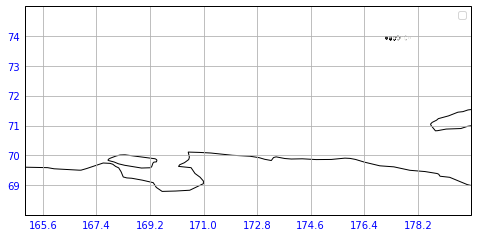

In [45]:
projection=ccrs.PlateCarree()
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [165, 180, 68, 75]
fig,ax = make_map(projection=projection)

ax.scatter(df['lon'], df['lat'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.gray,
           transform=transformation)

leg = ax.legend()

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

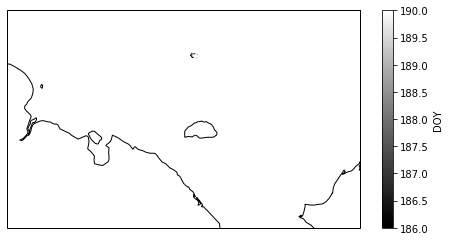

In [46]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-200, -160, 68, 74]
fig,ax = make_map(projection=projection)

sm=ax.scatter(df['lon'], df['lat'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.gray,
           transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.colorbar(sm,ax=ax,label='DOY')

In [47]:
fig.savefig(file.replace('csv','png'),dpi=300)

### and using SST location information

In [48]:
file = '300434063928220/2019/300434063928220_sst_data.csv'
df = pd.read_csv(file,
                 parse_dates=True,index_col='datetime')


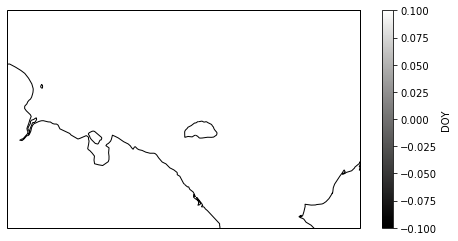

In [49]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-200, -160, 68, 74]
fig,ax = make_map(projection=projection)

sm=ax.scatter(df['GPSLon'], df['GPSLat'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.gray,
           transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.colorbar(sm,ax=ax,label='DOY')

In [50]:
fig.savefig(file.replace('.csv','GPSmap.png'),dpi=300)